In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

生成具有两个相同度序列的简单网络

In [4]:
G=nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(2,3),(1,3),(4,5)])
G2=nx.Graph()
G2.add_nodes_from([1,2,3,4,5])
G2.add_edges_from([(1,2),(1,3),(2,4),(3,5)])

画出对应的网络分布图和度分布
定义绘图函数plt_graph

In [21]:
def plt_graph(Graph,axis=None):
    pos=nx.circular_layout(Graph)
    nx.draw_networkx_nodes(Graph,pos=pos,node_size=500,node_color='r',alpha=0.6,ax=axis)
    nx.draw_networkx_edges(Graph,pos=pos,width=1.0,alpha=0.6,ax=axis)
    nx.draw_networkx_labels(Graph,pos=pos,font_size=16,ax=axis)

画出两个网络，并输出对应的平均度

G的平均度为： 1.6
G2的平均度为： 1.6


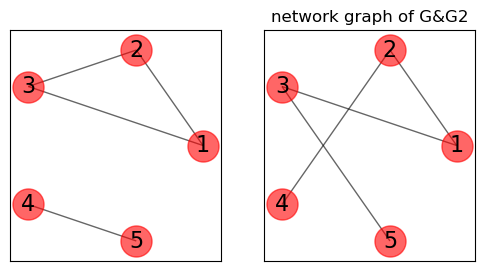

In [57]:
fig,ax=plt.subplots(1,2,figsize=(6,3))
plt_graph(G,axis=ax[0])
print("G的平均度为：",2*G.number_of_edges()/G.number_of_nodes())
plt_graph(G2,axis=ax[1])
print("G2的平均度为：",2*G2.number_of_edges()/G2.number_of_nodes())
plt.title("network graph of G&G2")
plt.show()

定义画出度分布直方图的函数

In [68]:
def draw_degree(Graph,axis=None):
    Matrix=dict(nx.degree(Graph))
    x=list(range(max(Matrix.values())+1))
    y=[i/len(G.nodes()) for i in nx.degree_histogram(G)]
    axis.set_xlabel("degree")
    axis.set_ylabel("P(k)")
    axis.bar(x,y)
    

依次画出G和G2的度分布直方图

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(6,3))
ax[0].set_title("degree distribution of G")
ax[1].set_title("degree distribution of G2")
draw_degree(G,ax[0])
draw_degree(G2,ax[1])